In [52]:
# Import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [53]:
# Move up one level to data, then access raw
file_path = '../raw/retail_sales_dataset.csv'

# Load the CSV file
retail_data = pd.read_csv(file_path)

# Display the first few rows of the data
print(retail_data.head())



   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [54]:
# Print basic information of the dataset
print(retail_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


The **categorical columns** are **Date** 📅, **Customer ID** 🆔, **Gender** 🚻, and **Product Category** 🏷️. These can be encoded into numerical values.

The **numerical columns** include **Transaction ID** 💳, **Age** 👶, **Quantity** 🔢, **Price per unit** 💲, and **Total Amount** 💰.

In [55]:
# Print summary statistics
print(retail_data.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [56]:
# Check for duplication
print(retail_data.nunique())

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64


We have **47 unique customer ages** 👶👴, offering an opportunity to create **age intervals** 📊. Interestingly, there are **five different prices** 💵 across all three product categories, while customers purchase only **four distinct quantities** 🛒.

In [57]:
# Check percentage of missing values
print((retail_data.isnull().sum() / len(retail_data)) * 100)

Transaction ID      0.0
Date                0.0
Customer ID         0.0
Gender              0.0
Age                 0.0
Product Category    0.0
Quantity            0.0
Price per Unit      0.0
Total Amount        0.0
dtype: float64


**No missing values** ✅ means we cannot remove any rows or make modifications to fill in missing values. 🔒

In [58]:
# Get the oldest and newest dates
oldest_date = retail_data['Date'].min()
newest_date = retail_data['Date'].max()

print(f'Oldest Date: {oldest_date}')
print(f'Newest Date: {newest_date}')

Oldest Date: 2023-01-01
Newest Date: 2024-01-01


In [59]:
# Convert the 'Date' column to datetime type because "dt" function can only used for datetime type
retail_data['Date'] = pd.to_datetime(retail_data['Date'])

# Extract the month as text and create a new column 'Date_Month'
retail_data['Date_Month'] = retail_data['Date'].dt.strftime('%B')

print(retail_data)

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    Male   34           Beauty   
1                 2 2023-02-27     CUST002  Female   26         Clothing   
2                 3 2023-01-13     CUST003    Male   50      Electronics   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
4                 5 2023-05-06     CUST005    Male   30           Beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    Male   62         Clothing   
996             997 2023-11-17     CUST997    Male   52           Beauty   
997             998 2023-10-29     CUST998  Female   23           Beauty   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount Date_Month  
0           3              50 

In [60]:
# Select categorical and numerical columns
cat_cols = retail_data.select_dtypes(include=['object']).columns.tolist()
num_cols = retail_data.select_dtypes(include=np.number).columns.tolist()

# Remove 'Customer ID' from cat_cols as the column is not useful for analyzing the dataset
cat_cols.remove('Customer ID')  

print("Categorical Variables:")
print(cat_cols)

# Remove 'Transaction ID' from num_cols as the column is not useful for analyzing the dataset
num_cols.remove('Transaction ID') 

print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Gender', 'Product Category', 'Date_Month']
Numerical Variables:
['Age', 'Quantity', 'Price per Unit', 'Total Amount']


**Univariate Analysis**

Age
Skew : -0.05


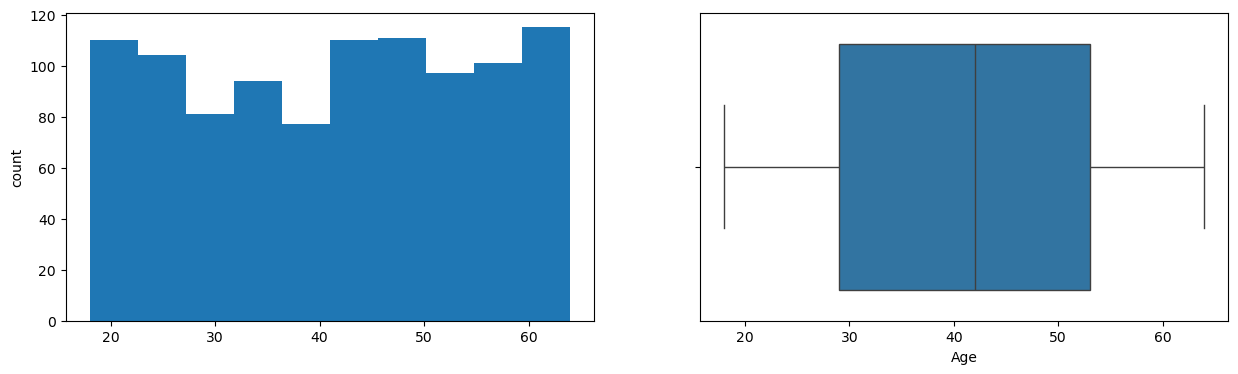

Quantity
Skew : -0.01


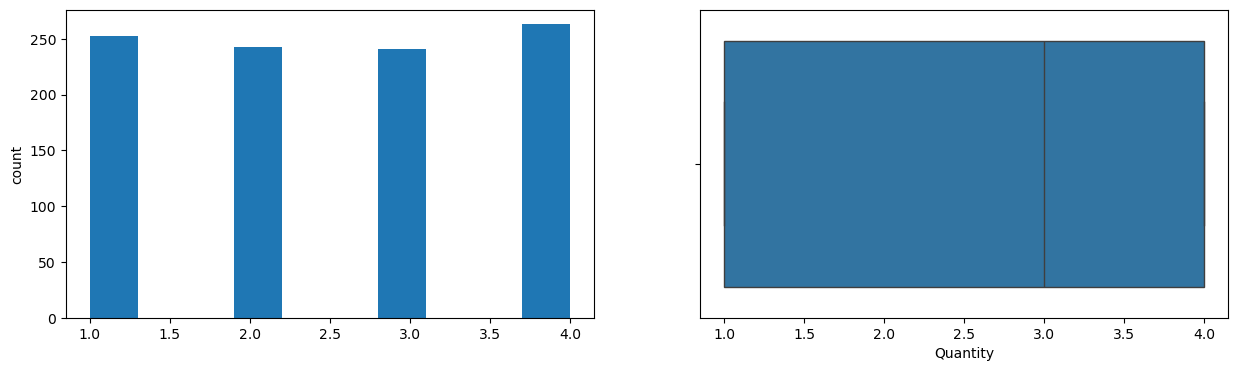

Price per Unit
Skew : 0.74


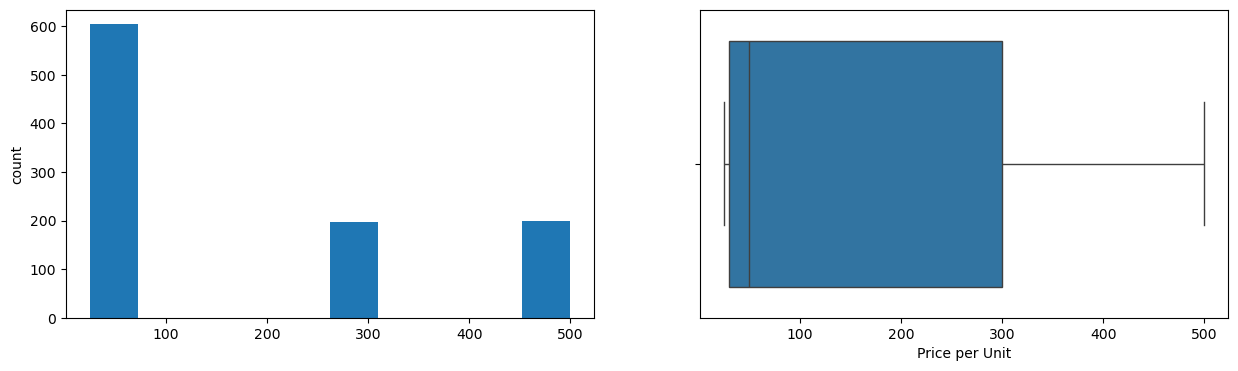

Total Amount
Skew : 1.38


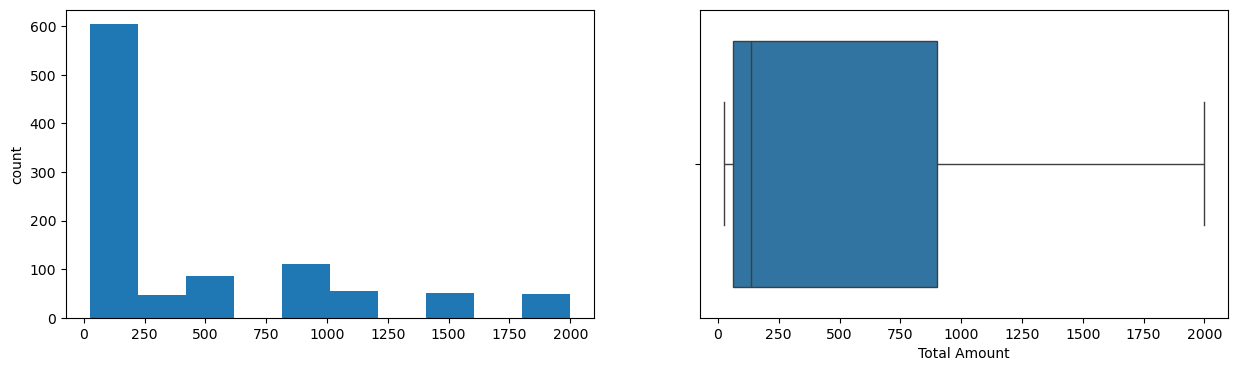

In [61]:
for col in num_cols:
    print(col)
    print('Skew :', round(retail_data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    retail_data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=retail_data[col])
    plt.show()

Interpretation:

Skewness = 0: Normally distributed

Skewness < 0: Left skew (negative skew)

Skewness > 0: Right skew (positive skew)

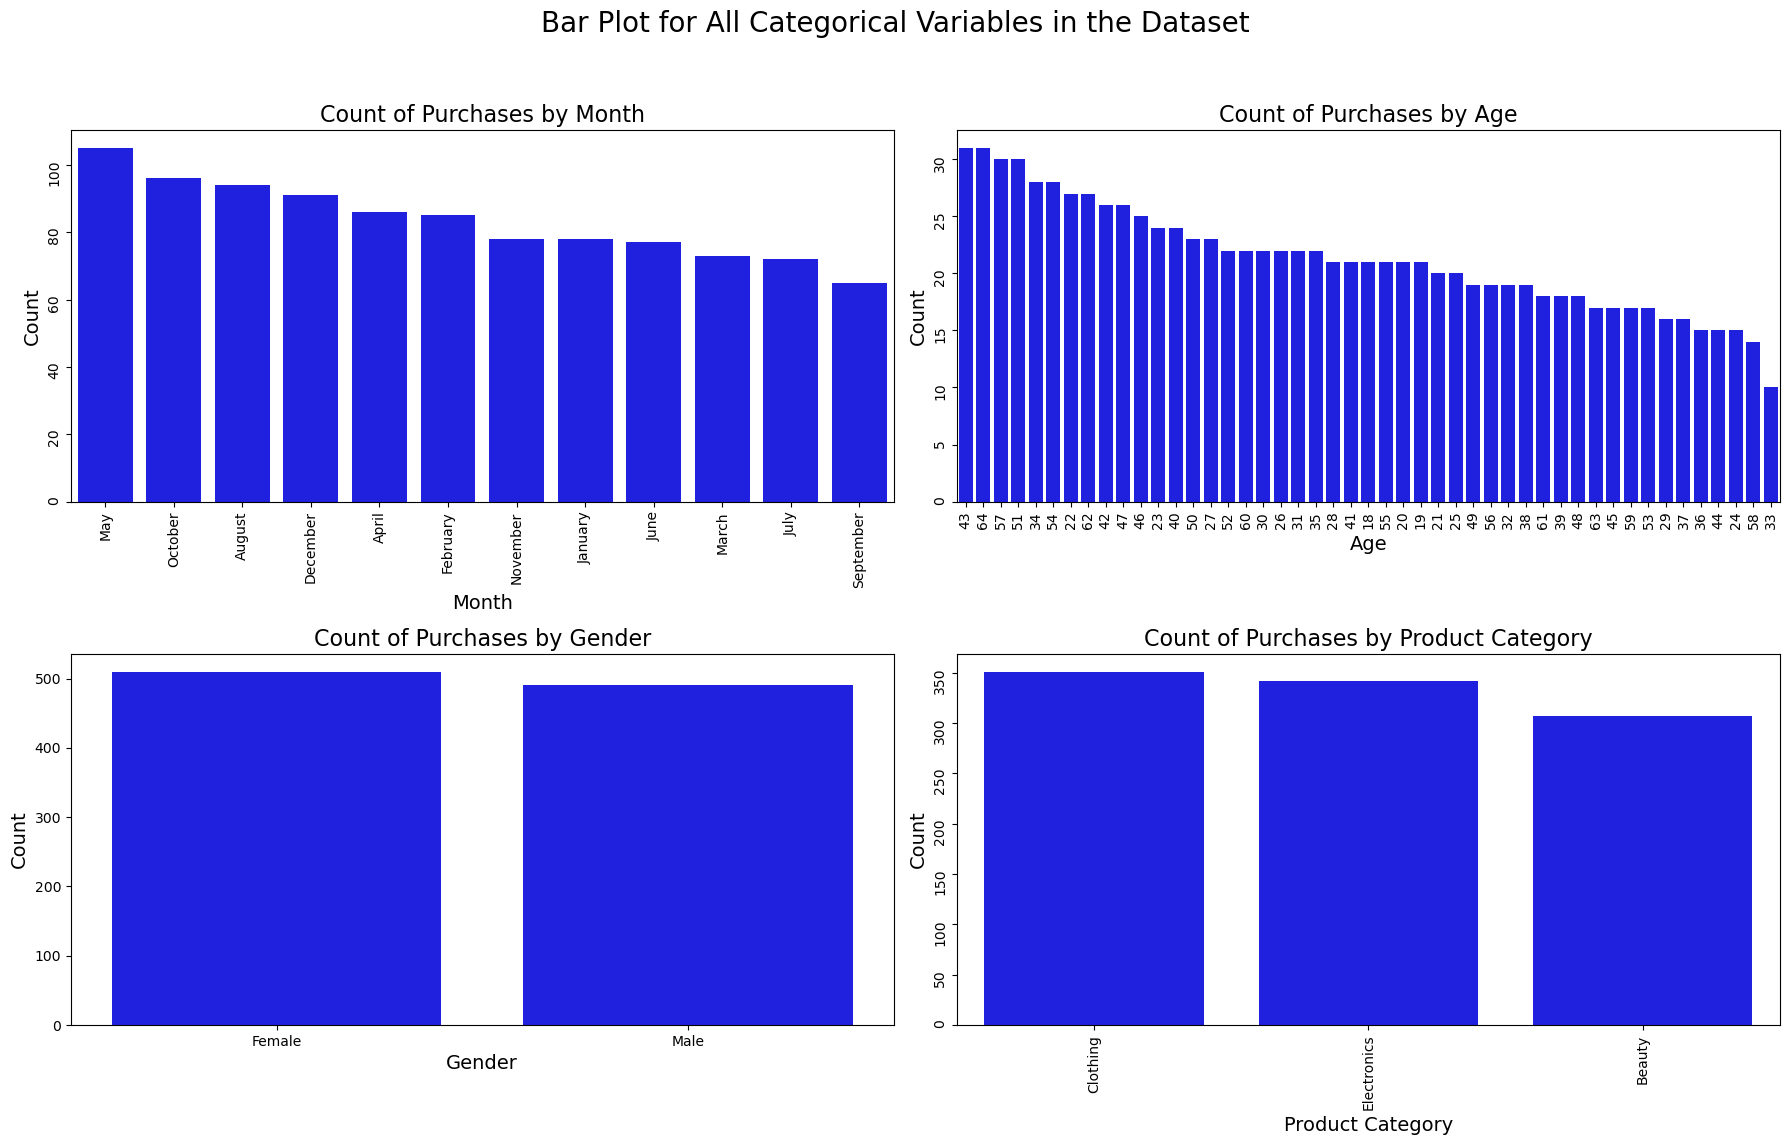

In [83]:
# Create subplots in a 2D array (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # Adjusted to 2 rows and 2 columns
fig.suptitle('Bar Plot for All Categorical Variables in the Dataset', fontsize=20)

# Bar plot for Date_Month
sns.countplot(ax=axes[0, 0], x='Date_Month', data=retail_data, color='blue', 
              order=retail_data['Date_Month'].value_counts().index)
axes[0, 0].set_title('Count of Purchases by Month', fontsize=16)
axes[0, 0].set_xlabel('Month', fontsize=14)
axes[0, 0].set_ylabel('Count', fontsize=14)
axes[0, 0].tick_params(labelrotation=90)

# Bar plot for Age
sns.countplot(ax=axes[0, 1], x='Age', data=retail_data, color='blue', 
              order=retail_data['Age'].value_counts().index)
axes[0, 1].set_title('Count of Purchases by Age', fontsize=16)
axes[0, 1].set_xlabel('Age', fontsize=14)
axes[0, 1].set_ylabel('Count', fontsize=14)
axes[0, 1].tick_params(labelrotation=90)

# Bar plot for Gender
sns.countplot(ax=axes[1, 0], x='Gender', data=retail_data, color='blue', 
              order=retail_data['Gender'].value_counts().index)
axes[1, 0].set_title('Count of Purchases by Gender', fontsize=16)
axes[1, 0].set_xlabel('Gender', fontsize=14)
axes[1, 0].set_ylabel('Count', fontsize=14)

# Bar plot for Product Category
sns.countplot(ax=axes[1, 1], x='Product Category', data=retail_data, color='blue', 
              order=retail_data['Product Category'].value_counts().index)
axes[1, 1].set_title('Count of Purchases by Product Category', fontsize=16)
axes[1, 1].set_xlabel('Product Category', fontsize=14)
axes[1, 1].set_ylabel('Count', fontsize=14)
axes[1, 1].tick_params(labelrotation=90)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Make room for the main title

# Show the plots
plt.show()

**Bivariate Analysis**

<Figure size 1800x600 with 0 Axes>

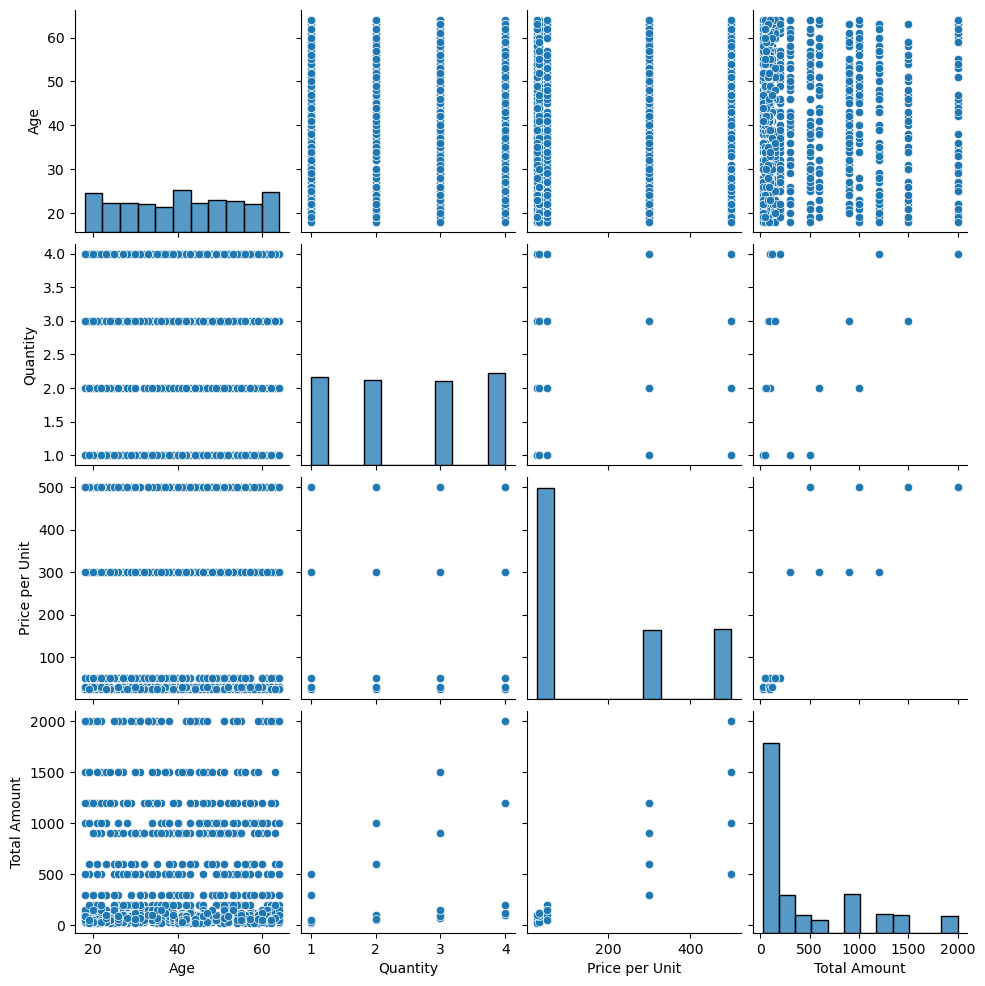

In [78]:
plt.figure(figsize=(18,6))
sns.pairplot(data=retail_data.drop(['Date','Customer ID','Transaction ID'],axis=1))
plt.show()

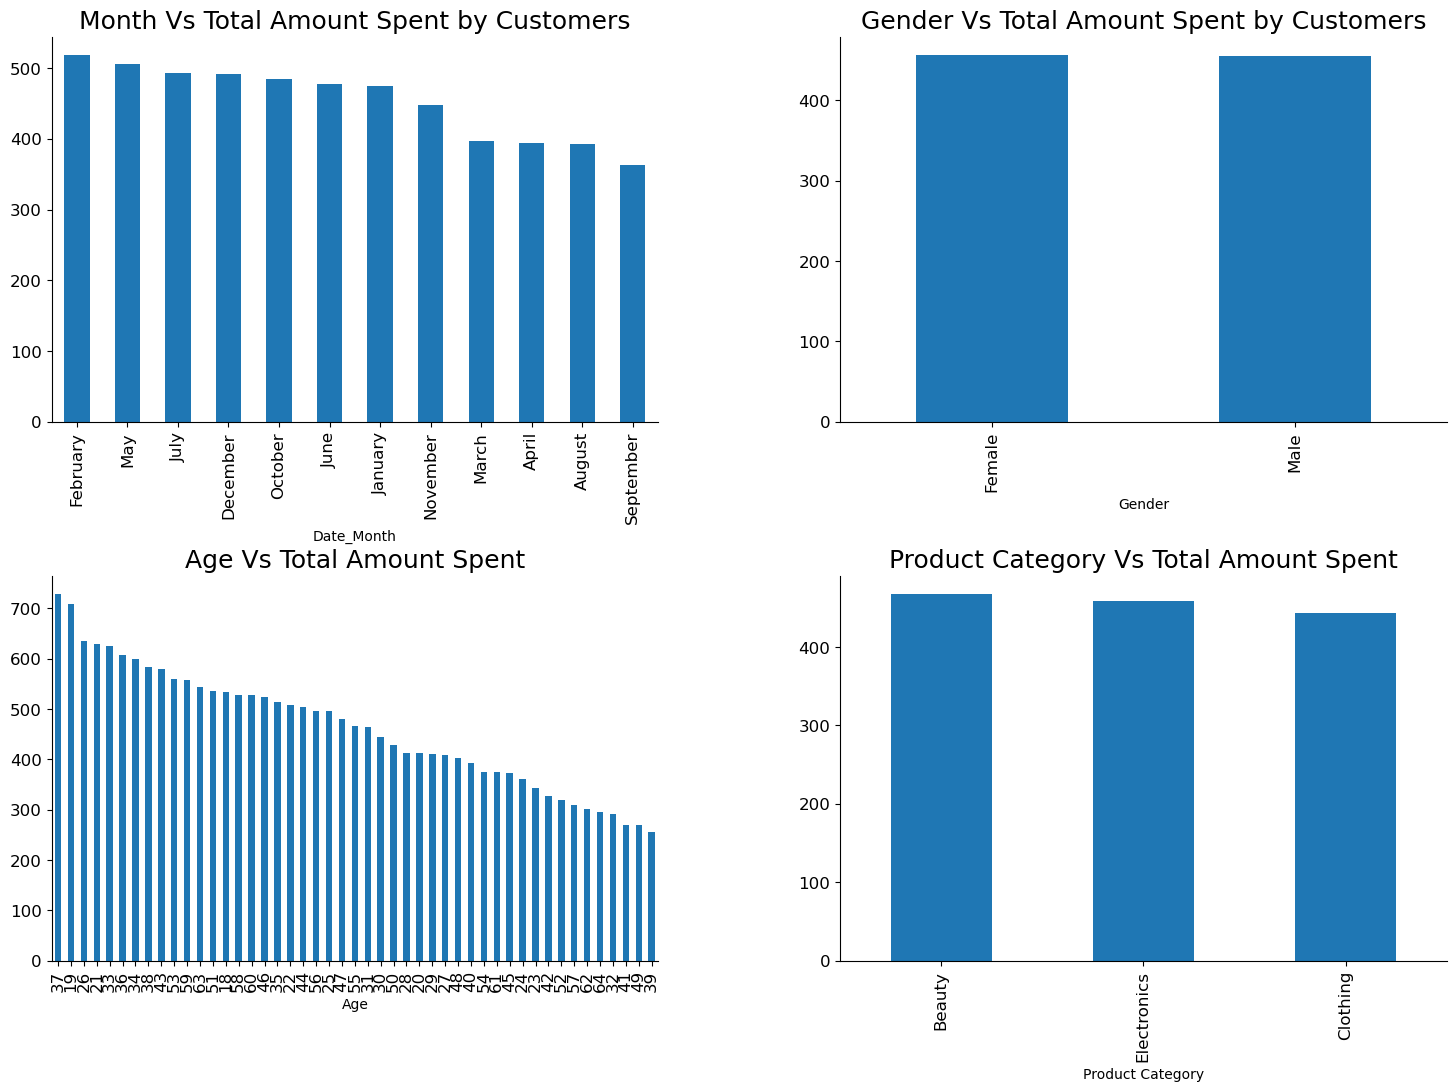

In [86]:
# Create subplots in a 2D array (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Bar plot for Date_Month
retail_data.groupby('Date_Month')['Total Amount'].mean().sort_values(ascending=False).plot.bar(ax=axes[0, 0], fontsize=12)
axes[0, 0].set_title("Month Vs Total Amount Spent by Customers", fontsize=18)

# Bar plot for Gender
retail_data.groupby('Gender')['Total Amount'].mean().sort_values(ascending=False).plot.bar(ax=axes[0, 1], fontsize=12)
axes[0, 1].set_title("Gender Vs Total Amount Spent by Customers", fontsize=18)

# Bar plot for Age
retail_data.groupby('Age')['Total Amount'].mean().sort_values(ascending=False).plot.bar(ax=axes[1, 0], fontsize=12)
axes[1, 0].set_title("Age Vs Total Amount Spent", fontsize=18)

# Bar plot for Product Category
retail_data.groupby('Product Category')['Total Amount'].mean().sort_values(ascending=False).plot.bar(ax=axes[1, 1], fontsize=12)
axes[1, 1].set_title("Product Category Vs Total Amount Spent", fontsize=18)

# Adjust spacing
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Combined adjustment for horizontal and vertical spacing

# Remove top and right spines
sns.despine()

# Show the plots
plt.show()